<a href="https://colab.research.google.com/github/tutsilianna/Automatic_Text_Processing_and_Image_Processing/blob/main/Spatial%20Filtering/Task_8_%7C_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will consider some image intensity and color correction methods, as well as discuss the image filtering. At first, let's install the correct lybrary version and import the required packets.

In [ ]:
!pip install opencv-python==4.4.0.42

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 MB 1.2 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## **Histogram and histogram construction**

Let's start with histogram construction. At first, let's upload the original image and display it. Recall, that the image is uploaded in BRG color model, therefore, to get the "original" colos in the image, we will change the color model to RGB.

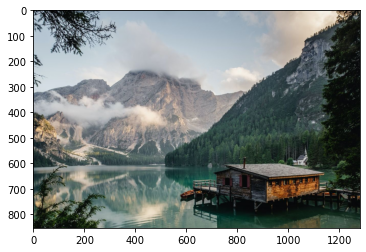

In [ ]:
img = cv2.imread('week3_image.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

Let's consider this image in grayscale color model. In this format, each pixel is characterized by its intensity, specified by an integer in the range $0 - 255$.

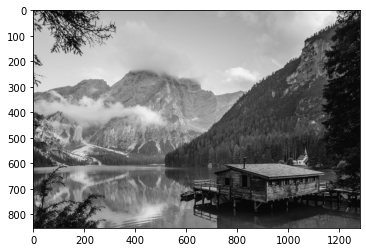

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

Let's "make" the histogram (actually, the histogram plot) of the grayscale image. The grayscale image histogram is a function $h(n)$, taking in the integer value $n$ (intensity) in the range $0 - 255$, and outputting the number of pixels with the intensity equal to $n$.

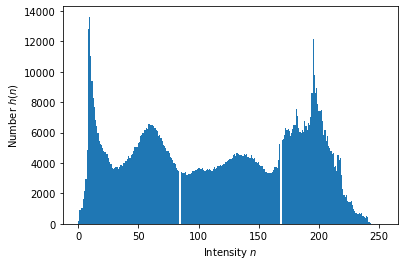

In [ ]:
gray_hist = plt.hist(gray_img.ravel(), bins = 256)
plt.xlabel('Intensity $n$')
plt.ylabel('Number $h(n)$')
plt.show()

We can notice that the most frequent pixels are those having the color similar to black (i.e. with almost zero intensity). Besides, there is a significant amount of pixels with insensity values equal to $55$ and $200$.

In case of RGB color model, we can build a histogram for each channel separately. Therefore, we obtain three functions: $h_{red}(n), h_{green}(n), h_{blue}(n)$, taking in the integer value $n$ (i.e. intensity) in the range $0 - 255$, and outputting the number of image pixels with the intensity $n$ in the corresponding channel. Besides, we can buid a cumulative image $h(n) = h_{red}(n) + h_{blue}(n) + h_{green}(n)$.

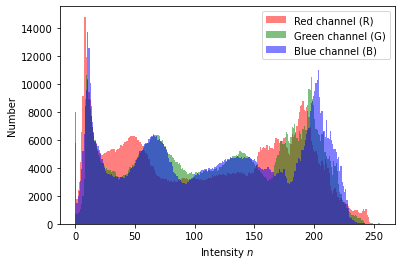

In [ ]:
plt.hist(RGB_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.hist(RGB_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.legend(['Red channel (R)', 'Green channel (G)', 'Blue channel (B)'])
plt.xlabel('Intensity $n$')
plt.ylabel('Number')
plt.show()

Note that the intensity distributions look very similar for different channels. That's why the cumulative intensity distribution has also a very predictable shape.

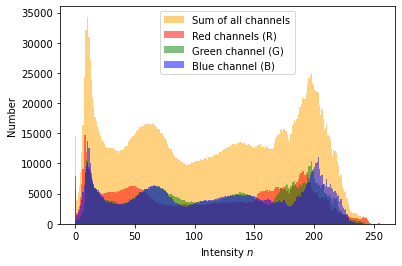

In [ ]:
plt.hist(RGB_img.ravel(), bins = 256, color = 'orange', alpha = 0.5)
plt.hist(RGB_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.hist(RGB_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.legend(['Sum of all channels', 'Red channels (R)', 'Green channel (G)', 'Blue channel (B)'])
plt.xlabel('Intensity $n$')
plt.ylabel('Number')
plt.show()

Obviously, it is reasonable to compare the distributions when the values ​​along the ordinate axis are frequencies. In this case the histogram is nothing more than an estimate of intensity distribution density.

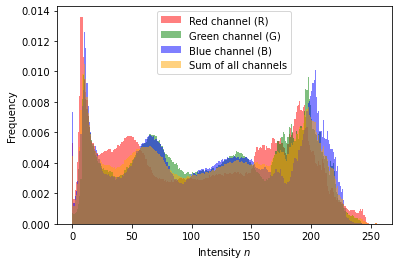

In [ ]:
plt.hist(RGB_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)
plt.hist(RGB_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
plt.hist(RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
plt.hist(RGB_img.ravel(), bins = 256, color = 'orange', alpha = 0.5, density=True)
plt.legend(['Red channel (R)', 'Green channel (G)', 'Blue channel (B)', 'Sum of all channels'])
plt.xlabel('Intensity $n$')
plt.ylabel('Frequency')
plt.show()

## **Contrast adjustment using histogram**

Let's use a histogram to adjust image contrast.

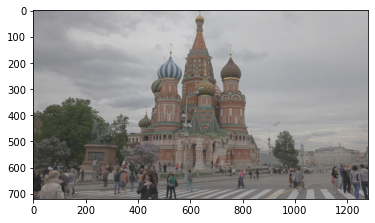

In [ ]:
img = cv2.imread('week3_image_2.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

The image is very dull. Let's build a histogram of e.g. a blue channel (B).

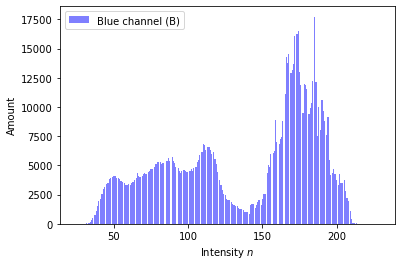

In [ ]:
plt.hist(RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.legend(['Blue channel (B)'])
plt.xlabel('Intensity $n$')
plt.ylabel('Amount')
plt.show()

You can see that not all intensity values are present on the histogram. Let's correct it, for example, using linear normalization. To do that we at first shift the histogram so, that it starts from zero, and then we stretch it to the entire range $0 - 255$.

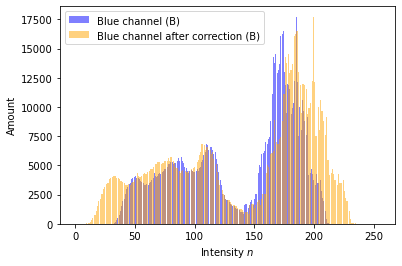

In [ ]:
plt.hist(RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Intensity $n$')
plt.ylabel('Amount')
RGB_img_new = RGB_img.copy()
RGB_img_new[:, :, 2] = (RGB_img_new[:, :, 2] - np.min(RGB_img_new[:, :, 2]))/(np.max(RGB_img_new[:, :, 2]) - np.min(RGB_img_new[:, :, 2]))*255
plt.hist(RGB_img_new[:, :, 2].ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.legend(['Blue channel (B)', 'Blue channel after correction (B)'])
plt.show()

You can see that the distribution has slightly changed. Let's aplly the same transformations to other channels and display the image after contrast adjustment.

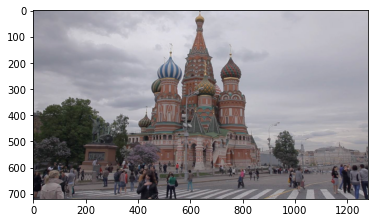

In [ ]:
RGB_img_new[:, :, 0] = (RGB_img_new[:, :, 0] - np.min(RGB_img_new[:, :, 0]))/(np.max(RGB_img_new[:, :, 0]) - np.min(RGB_img_new[:, :, 0]))*255
RGB_img_new[:, :, 1] = (RGB_img_new[:, :, 1] - np.min(RGB_img_new[:, :, 1]))/(np.max(RGB_img_new[:, :, 1]) - np.min(RGB_img_new[:, :, 1]))*255
plt.imshow(RGB_img_new)

Now it's better, but still not all that well. It is quite clear that an image, where pixels tend to spread along the entire range of possible intensity levels and, in addition, have a distribution close to a uniform one, will have high contrast and exhibit a wide variety of tones. But of course, the linear transformation described above hardly helps to uniformly "spread" the intensity, it only changes the intensity range.

There are many different methods of histogram equalizing. Let's consider one of them.

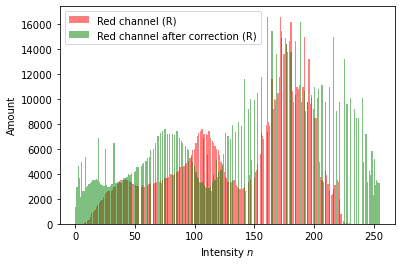

In [ ]:
plt.hist(RGB_img_new[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.xlabel('Intensity $n$')
plt.ylabel('Amount')
RGB_img_new[:, :, 0] = cv2.equalizeHist(RGB_img_new[:, :, 0])
plt.hist(RGB_img_new[:, :, 0].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.legend(['Red channel (R)', 'Red channel after correction (R)'])
plt.show()

It is clear that the green histogram density is closer the one of the desired uniform distribution. Similarly, we equalize other histograms and get the following result.

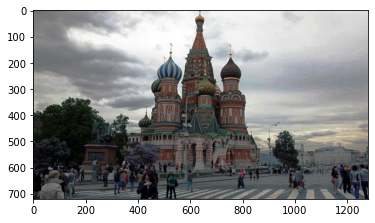

In [ ]:
RGB_img_new[:, :, 1] = cv2.equalizeHist(RGB_img_new[:, :, 1])
RGB_img_new[:, :, 2] = cv2.equalizeHist(RGB_img_new[:, :, 2])
plt.imshow(RGB_img_new)

## **Image filtering**

Let's learn how to sharpen an image. To do this, first we will learn to solve the opposite problem, i.e. the problem of blurring an image. The task of image blurring often arises in image preprocessing. For example, for successful segmentation, it is often worth hiding (or blurring) small insignificant details.

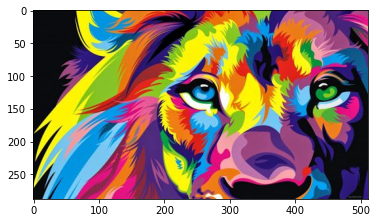

In [ ]:
img = cv2.imread('week3_image_4.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

It is quite easy to blur the image by convolving it with some kernel. For example, let's take the following kernel first:
$$
K = \frac{1}{9}\begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix}.
$$
The fact that the sum of the elements of the kernel equals $1$, ensures that the image intensity remains unchanged. The kernel itself makes the following: to the applied pixel (which is in the center) it adds a linear combination of equally weighted features of the neighbouring pixels.

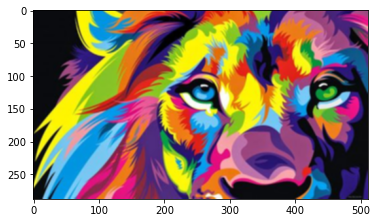

In [ ]:
kernel = np.ones((3, 3), np.float32) / 9
RGB_img_new = cv2.filter2D(RGB_img, -1, kernel)
plt.imshow(RGB_img_new)

To make the blurring more visible, let's aplly a kernel of a larger size.

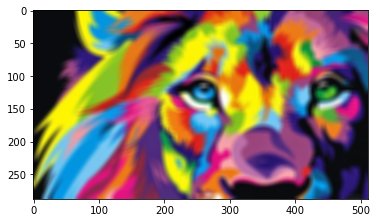

In [ ]:
kernel = np.ones((9, 9), np.float32) / 81
RGB_img_new = cv2.filter2D(RGB_img, -1, kernel)
plt.imshow(RGB_img_new)

Let's consider another kernel, which is similar to the Gaussian kernel:
$$
K = \frac{1}{16}\begin{pmatrix}
1 & 2 & 1\\
2 & 4 & 2\\
1 & 2 & 1
\end{pmatrix}
$$
and make a convolution.

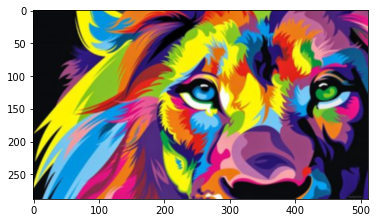

In [ ]:
kernel = np.ones((3, 3), np.float32) / 16
kernel[0][1] = kernel[1][0] =  kernel[1][2] = kernel[2][1] = 2/16
kernel[1][1] = 4/16
RGB_img_new = cv2.filter2D(RGB_img, -1, kernel)
plt.imshow(RGB_img_new)

To apply the Gaussian kernel, we can use a special method, namely, cv2.GaussianBlur(). It is also possible to create a Gaussian kernel directly using cv2.getGaussianKernel().

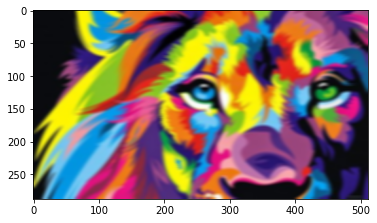

In [ ]:
RGB_img_new = cv2.GaussianBlur(RGB_img, (13,5), 3)
plt.imshow(RGB_img_new)

Let's subtract from the original image the blurred image and display the result.

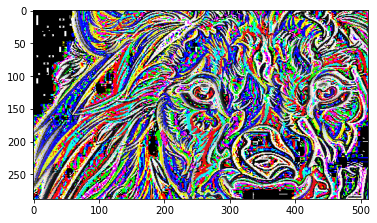

In [ ]:
RGB_img_remaining = RGB_img - RGB_img_new
plt.imshow(RGB_img_remaining)

We see a so-called image with added details. It is clear that if we add it to the blurred image, then we get the original sharp image. But what if the original image is already blurry? Let's blur it a little bit more and look at the image with added details.

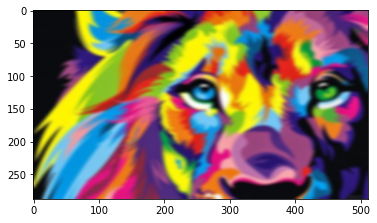

In [ ]:
kernel = np.ones((3, 3), np.float32) / 16
kernel[0][1] = kernel[1][0] =  kernel[1][2] = kernel[2][1] = 2/16
kernel[1][1] = 4/16
RGB_img_new2 = cv2.filter2D(RGB_img_new, -1, kernel)
plt.imshow(RGB_img_new2)

Now let's take the difference and add it to the original blurred image with some coefficients.

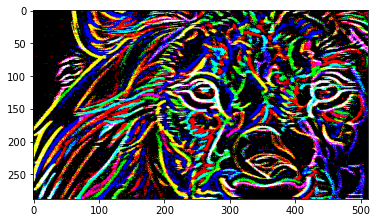

In [ ]:
RGB_img_remaining = RGB_img_new - RGB_img_new2
plt.imshow(RGB_img_remaining)

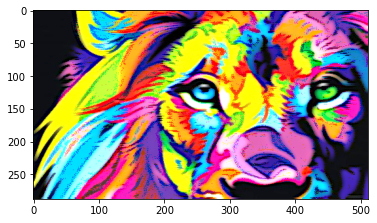

In [ ]:
RGB_img_final = cv2.addWeighted(RGB_img_new, 1.5, RGB_img_remaining, -0.5,0)
plt.imshow(RGB_img_final)

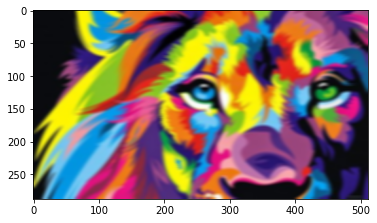

In [ ]:
plt.imshow(RGB_img_new)

We see that the image sharpness is enhanced. One more way to sharpen the image is to apply a special kernel. For example, such a kernel:
$$
K = \begin{pmatrix}
-1 & -1 & -1 \\
-1 & 9 & -1 \\
-1 & -1 & -1
\end{pmatrix}.
$$
Let's have a look at the result.

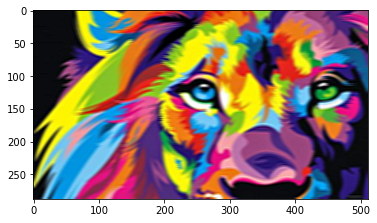

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
RGB_img_final2 = cv2.filter2D(RGB_img_new, -1, kernel)
plt.imshow(RGB_img_final2)

The sharpness is enhanced. To see other kernel examples click the [link](https://en.wikipedia.org/wiki/Kernel_(image_processing).

Finally, let's learn how to remove noise from an image. Consider black-and-white images with salt and pepper noise, where the color of random image pixels is changed either white or black. The image below is almost unreadable, although we can guess the main object is, of course.

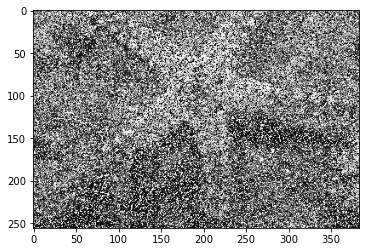

In [ ]:
img = cv2.imread('week3_image_3.jpg')
plt.imshow(img)

Let's apply a median filter, namely, `cv2.medianBlur(source, ksize)`. The second argument `ksize` takes the odd values starting from $3$ and corresponds to the "neighborhood size", i.e. the matrix with the pixel of interest in the center, the elements of which are used to compute the median.


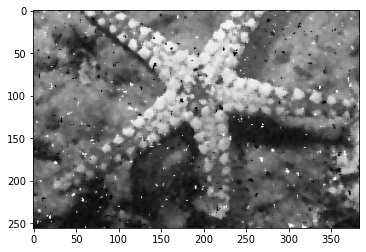

In [ ]:
img_final = cv2.medianBlur(img, 5)
plt.imshow(img_final)

Other filters are to be found in additional materials.

